<a href="https://colab.research.google.com/github/KameswaraRaoDoddi/MyProject/blob/master/Decision_Trees_ClassificationDrug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Decision Trees**


**Objectives**

Develop a classification model using Decision Tree Algorithm
In this lab exercise, you will learn a popular machine learning algorithm, Decision Tree. You will use this classification algorithm to build a model from historical data of patients, and their response to different medications. Then you use the trained decision tree to predict the class of a unknown patient, or to find a proper drug for a new patient.

**Table of contents**

1. About the dataset
2. Downloading the Data
3. Pre-processing
4. Setting up the Decision Tree
5. Modeling
6. Prediction
7. Evaluation
8. Visualization
---------------------------

Import the Following Libraries:

numpy (as np)
pandas
DecisionTreeClassifier from sklearn.tree


In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

**About the dataset**

Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y.

Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.

It is a sample of multiclass classifier, and you can use the training part of the dataset to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.

**Downloading the Data**

To download the data, we will use !wget to download it from IBM Object Storage.

In [3]:
!wget -O drug200.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv

--2021-03-11 22:28:40--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5827 (5.7K) [text/csv]
Saving to: ‘drug200.csv’

drug200.csv         100%[===================>]   5.69K  --.-KB/s    in 0s      

2021-03-11 22:28:40 (1.15 GB/s) - ‘drug200.csv’ saved [5827/5827]



Now, read data using pandas dataframe:

In [4]:
my_data = pd.read_csv("drug200.csv",delimiter=",")
my_data[0:5]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


What is the size of data?

In [5]:
my_data.shape

(200, 6)

Pre-processing

Using my_data as the Drug.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of my_data)
y as the response vector (target)

In [6]:
my_data.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [13]:
X = my_data[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.113999999999999],
       [28, 'F', 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

As you may figure out, some features in this dataset are categorical such as Sex or BP. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. pandas.get_dummies() Convert categorical variable into dummy/indicator variables.

In [14]:
from sklearn import preprocessing
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
X[:,1] = le_sex.transform(X[:,1])


In [15]:
X[0:5]

array([[23, 0, 'HIGH', 'HIGH', 25.355],
       [47, 1, 'LOW', 'HIGH', 13.093],
       [47, 1, 'LOW', 'HIGH', 10.113999999999999],
       [28, 0, 'NORMAL', 'HIGH', 7.797999999999999],
       [61, 0, 'LOW', 'HIGH', 18.043]], dtype=object)

In [18]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit(['NORMAL','HIGH'])
X[:,3] = le_BP.transform(X[:,3])
X[0:5]


array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.113999999999999],
       [28, 0, 2, 0, 7.797999999999999],
       [61, 0, 1, 0, 18.043]], dtype=object)

Now we can fill the target variable.

In [19]:
y =my_data["Drug"]
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

**Setting up the Decision Tree**

We will be using train/test split on our decision tree. Let's import train_test_split from sklearn.cross_validation.

In [20]:
from sklearn.model_selection import train_test_split

Now train_test_split will return 4 different parameters. We will name them:
X_trainset, X_testset, y_trainset, y_testset

The train_test_split will need the parameters:
X, y, test_size=0.3, and random_state=3.

The X and y are the arrays required before the split, the test_size represents the ratio of the testing dataset, and the random_state ensures that we obtain the same splits.

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 4)

Print the shape of X_trainset and y_trainset. Ensure that the dimensions match

In [22]:
print('Shape of X training set {}'.format(X_train.shape), '&', 'Size of Y training set {}'.format(y_train.shape))

Shape of X training set (140, 5) & Size of Y training set (140,)


Print the shape of X_testset and y_testset. Ensure that the dimensions match

In [23]:
print('Shape of X test set {}'.format(X_test.shape), '&', 'Shape of y test set {}'.format(y_test.shape))

Shape of X test set (60, 5) & Shape of y test set (60,)


**Modeling**

We will first create an instance of the DecisionTreeClassifier called drugTree.
Inside of the classifier, specify criterion="entropy" so we can see the information gain of each node.

In [26]:
drugTree = DecisionTreeClassifier(criterion='entropy',max_depth=5)
drugTree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Model Fit

In [27]:
drugTree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Prediction**

In [29]:
predTree = drugTree.predict(X_test)

You can print out predTree and y_testset if you want to visually compare the prediction to the actual values.

In [30]:
print (predTree [0:5])
print (y_test [0:5])

['drugY' 'drugY' 'drugY' 'drugY' 'drugC']
11     drugY
99     drugY
128    drugY
175    drugY
1      drugC
Name: Drug, dtype: object


**Evaluation**

In [32]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
print("Decision Tree Accuracy: ", accuracy_score(y_test,predTree))

Decision Tree Accuracy:  0.9666666666666667


**Visualization**
Lets visualize the tree

In [37]:
# Notice: You might need to uncomment and install the pydotplus and graphviz libraries if you have not installed these before
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

/bin/bash: conda: command not found
/bin/bash: conda: command not found


In [40]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

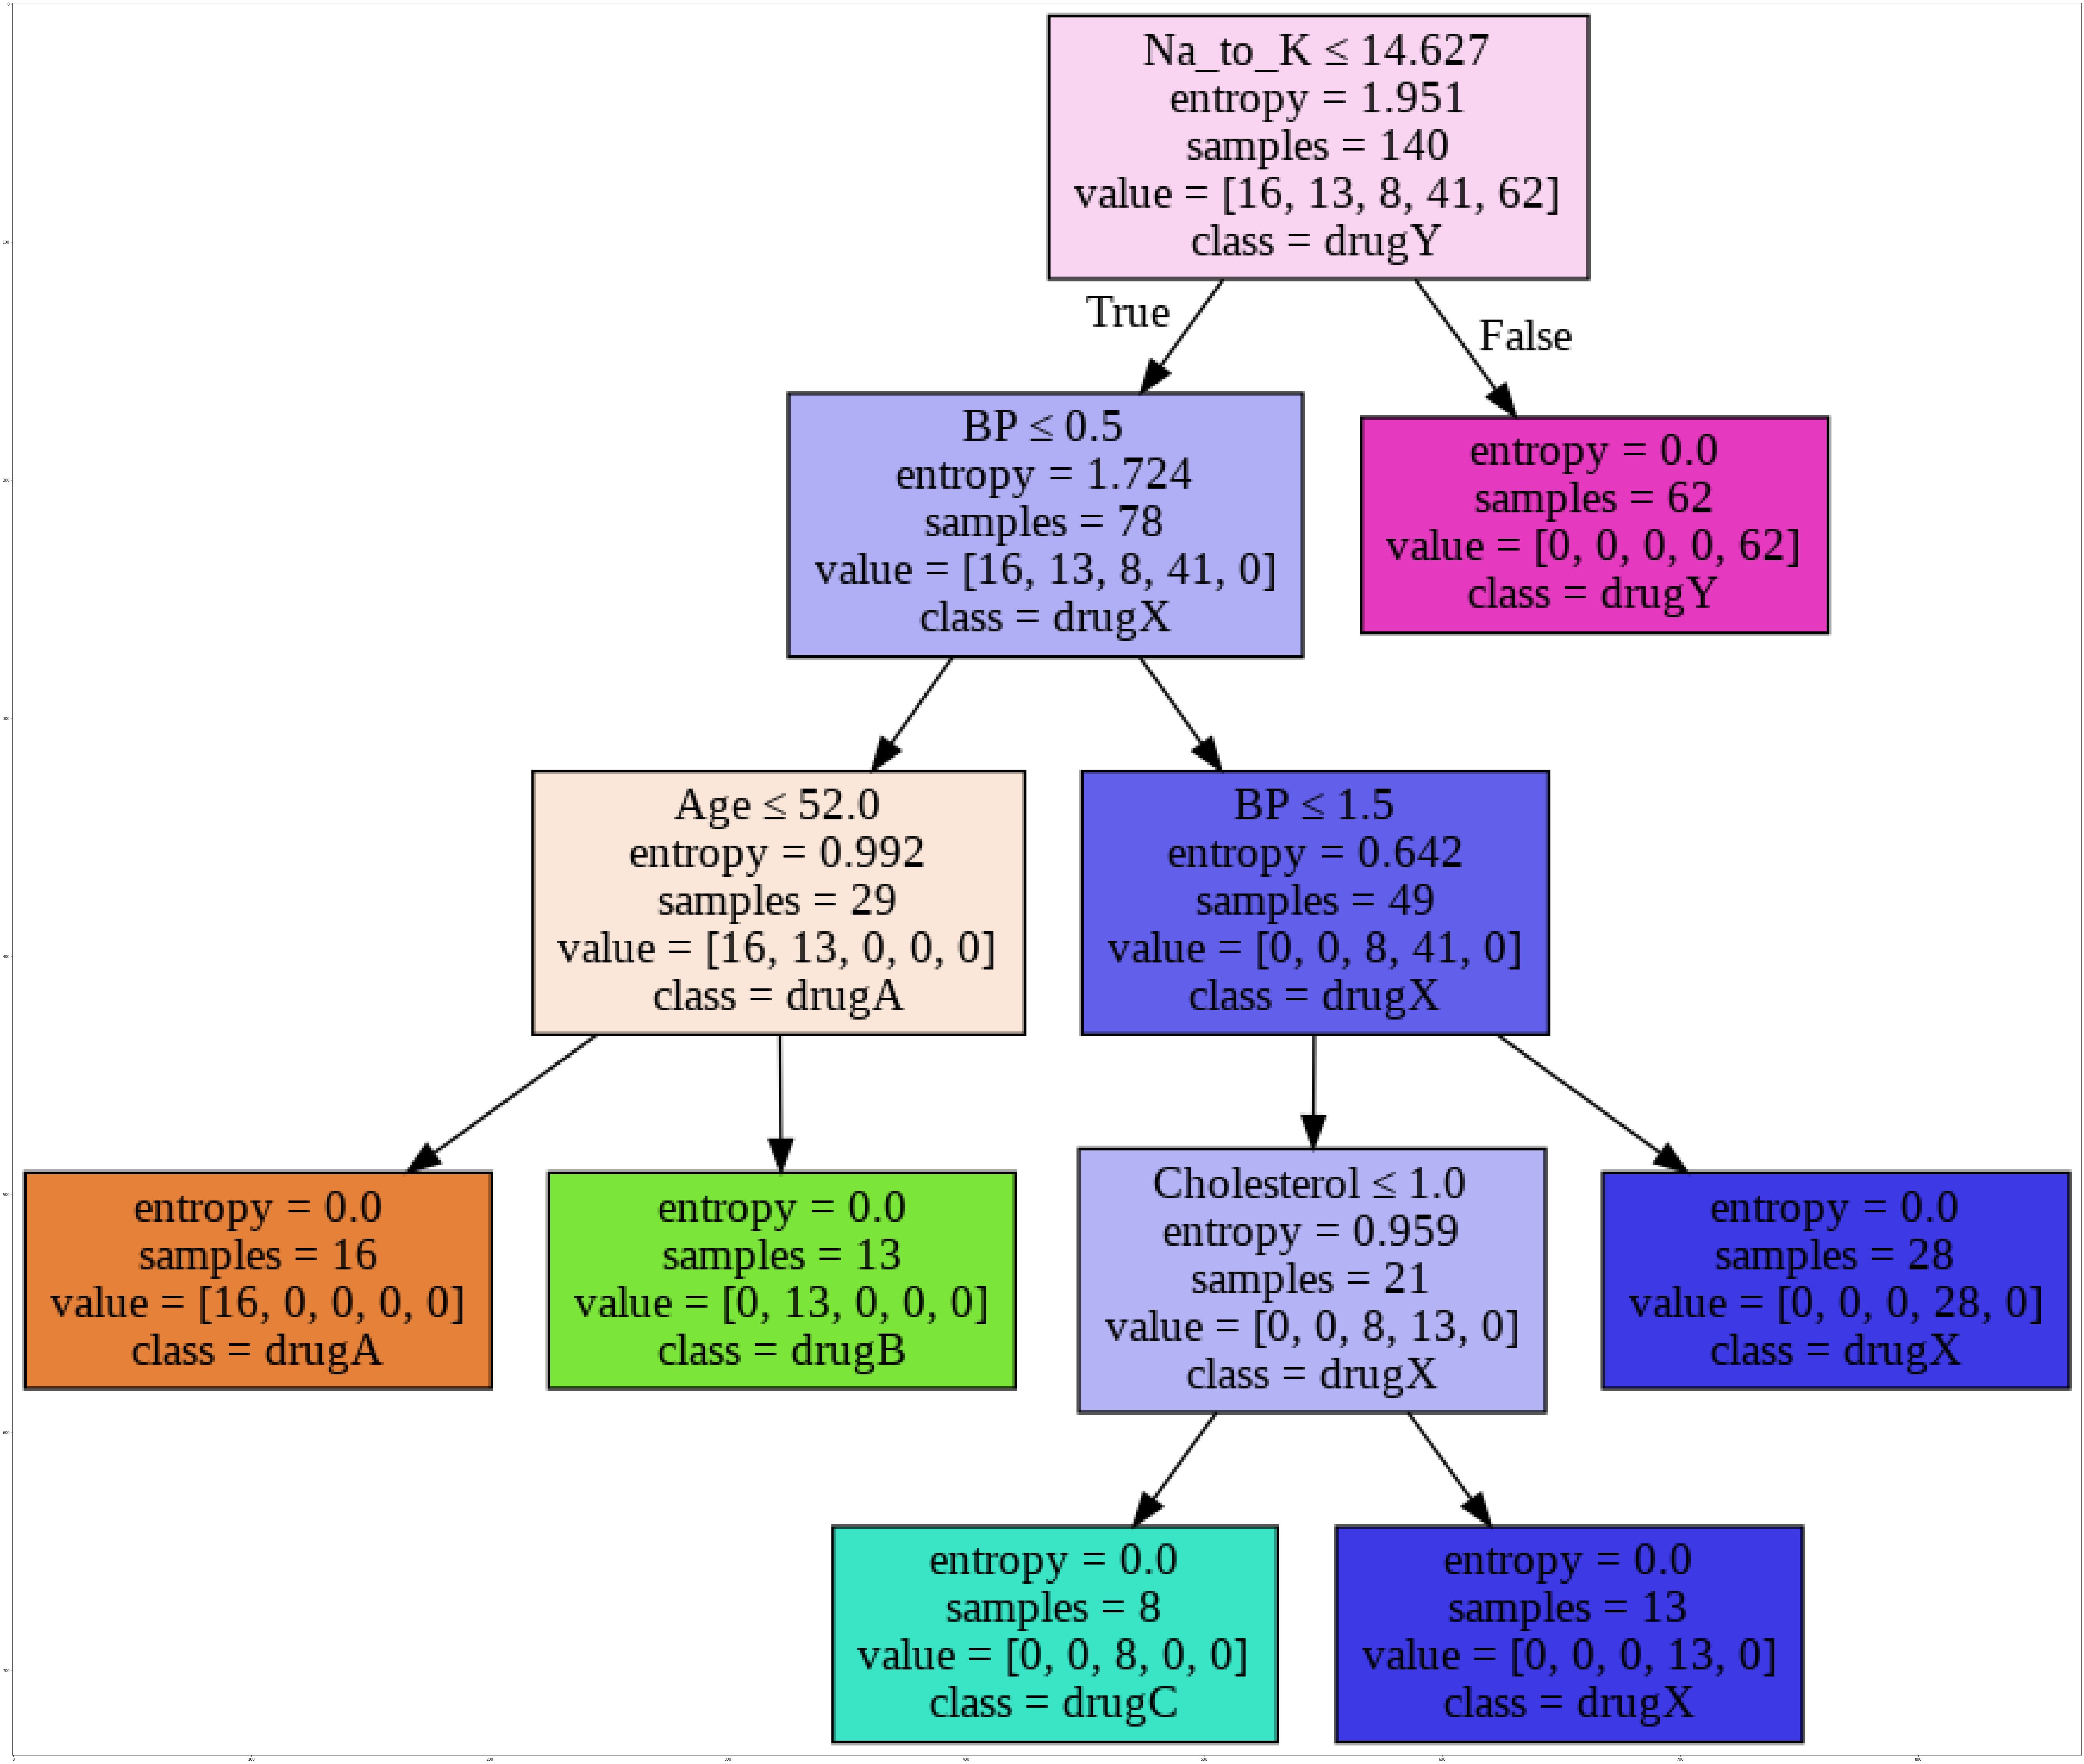

In [42]:
dot_data = StringIO()
filename = "drugtree.png"
featureNames = my_data.columns[0:5]
out=tree.export_graphviz(drugTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')